In [7]:
#Now making prediction using Breast_Cancer Dataset
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [16]:
#So either cancer can be malignant or benign
#lets print decription of the dataset shape
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [21]:
cancer.data.shape
#so the dataset contains 569 rows and 30 columns/features

(569, 30)

<h2>Lets print how many rows are of either maligant or benign</h2>

In [27]:
#for that import numpy package
import numpy as np

np.bincount(cancer.target)


array([212, 357], dtype=int64)

In [29]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

<h2>Its clear that 212 rows are of 'Malignant' and remaining are of 'Benign'</h2>

In [30]:
#now lets print features names of the dataset
cancer['feature_names']


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
#total features can be printed using below command
np.shape(cancer['feature_names'])

(30,)

In [35]:
#now split the data 
from sklearn.model_selection import train_test_split

In [36]:
X=cancer.data
y=cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


In [39]:
#Now to build a classifier, selectg random neigbors
#Selecting KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [76]:
#neighbors will be selected in the range of (1,11)
for n_neighbors in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    


In [44]:
clf.score(X_test,y_test)*100

94.4055944055944

<h2>As seen above the data is able to make 94.4% accurate predictions 

In [62]:
import matplotlib.pyplot as plt

In [63]:
neighbors_settings=range(1,11)
training_accuracy=[]
test_accuracy=[]
training_accuracy.append(clf.score(X_train,y_train))
test_accuracy.append(clf.score(X_test,y_test))

In [64]:
print(training_accuracy)

[0.9366197183098591]


In [66]:
print(test_accuracy)

[0.9440559440559441]


In [78]:
cancer['data'][:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

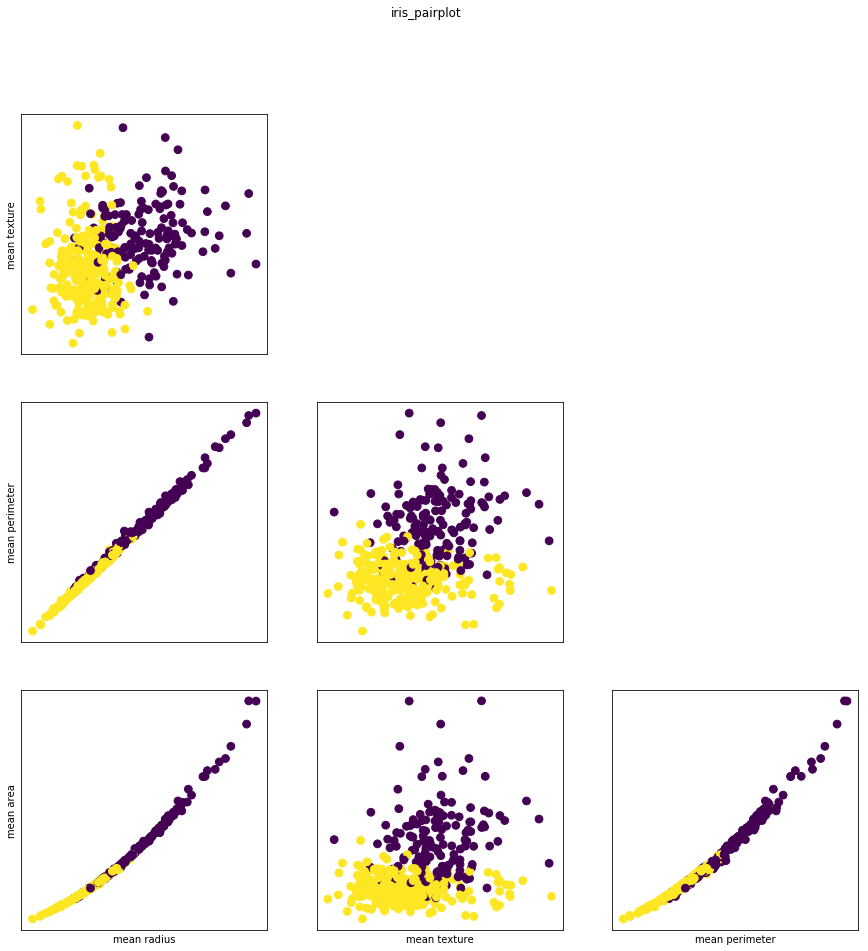

In [80]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
plt.suptitle("iris_pairplot")
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j],X_train[:,i+1],c=y_train,s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        if i==2:
            ax[i,j].set_xlabel(cancer['feature_names'][j])
        if j==0:
            ax[i,j].set_ylabel(cancer['feature_names'][i+1])
        if j>i:
            ax[i,j].set_visible(False)